# Big Cities Health Data

## Load Modules

In [1]:
# Data manipulation
import pandas as pd
pd.options.display.max_columns = 60
import numpy as np
from IPython.display import display

# Visualizations
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid': False})

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

## Load and Sample Data

The following creates a small sample file that can be opened easily in Excel.

In [2]:
import unicodecsv

with open('data/bchi.csv', 'rb') as fin:
    freader = unicodecsv.reader(fin, delimiter=',')
    with open('data/bchi_sample.csv', 'wb') as fout:
        fwriter = unicodecsv.writer(fout, delimiter=',')
        count = 0
        for row in freader:            
            fwriter.writerow(row)
            count += 1
            if count==250:
                break

In [3]:
health = pd.read_csv('data/bchi.csv')
health_df = pd.DataFrame(health)

In [4]:
health_df['Place'].value_counts()

U.S. Total                         1288
New York City, NY                  1110
Seattle, WA                         954
Phoenix, AZ                         932
Boston, MA                          912
Minneapolis, MN                     882
Miami (Miami-Dade County), FL       848
Denver, CO                          759
Los Angeles, CA                     732
Las Vegas (Clark County), NV        717
Long Beach, CA                      712
San Diego County, CA                705
Kansas City, MO                     691
Chicago, IL                         687
Detroit, MI                         674
San Antonio, TX                     617
Philadelphia, PA                    600
Washington, DC                      582
Houston, TX                         576
Oakland, CA                         531
San Francisco, CA                   517
Portland (Multnomah County), OR     501
San Jose, CA                        482
Fort Worth (Tarrant County), TX     427
Cleveland, OH                       373


In [5]:
health_df[health_df.Place.str.contains(', ')].Place.value_counts()

New York City, NY                  1110
Seattle, WA                         954
Phoenix, AZ                         932
Boston, MA                          912
Minneapolis, MN                     882
Miami (Miami-Dade County), FL       848
Denver, CO                          759
Los Angeles, CA                     732
Las Vegas (Clark County), NV        717
Long Beach, CA                      712
San Diego County, CA                705
Kansas City, MO                     691
Chicago, IL                         687
Detroit, MI                         674
San Antonio, TX                     617
Philadelphia, PA                    600
Washington, DC                      582
Houston, TX                         576
Oakland, CA                         531
San Francisco, CA                   517
Portland (Multnomah County), OR     501
San Jose, CA                        482
Fort Worth (Tarrant County), TX     427
Cleveland, OH                       373
Baltimore, MD                       301


In [6]:
location_df = health_df.copy()
location_df.loc[:,'City'] = location_df['Place'].str.split(', ').str.get(0)
location_df.loc[:,'State'] = location_df['Place']
location_df.loc[location_df['State']!='U.S. Total','State'] = location_df['Place'].str.split(', ').str.get(1)
#location_df.head()
location_df.to_csv('data/bhmi_locations.csv')

## Data Structure

In [7]:
health_df.shape

(18329, 17)

In [8]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18329 entries, 0 to 18328
Data columns (total 17 columns):
Indicator Category                  18329 non-null object
Indicator                           18329 non-null object
Shortened Indicator Name            18329 non-null object
Shortened Indicator Name (Graph)    1643 non-null object
Year                                18329 non-null int64
Sex                                 18329 non-null object
Race/Ethnicity                      18329 non-null object
Value                               18329 non-null object
Place                               18329 non-null object
BCHC Requested Methodology          18329 non-null object
Source                              15907 non-null object
Methods                             5084 non-null object
Notes                               5054 non-null object
90% Confidence Level - Low          2359 non-null object
90% Confidence Level - High         2359 non-null object
95% Confidence Level - Low 

In [9]:
health_df.describe(include=['O'])

,Indicator Category,Indicator,Shortened Indicator Name,Shortened Indicator Name (Graph),Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
count,18329,18329,18329,1643,18329,18329,18329,18329,18329,15907,5084,5054,2359,2359,2264,2264
unique,11,53,53,6,3,11,2915,27,322,640,254,211,583,654,817,948
top,Chronic Disease,Percent of Population Uninsured,Population Uninsured,Rate of Lab Confirmed Salmonella Infections,Both,All,0.0,U.S. Total,"All cancer mortality rate per 100,000 populati...",DP05 - Demographic and Housing Estimates: ACS ...,"Rates per 100,000 calculated using the Minneap...",Deaths for which cause was listed as Òdeferred...,0.1,0.3,4.7,13.4
freq,3150,706,706,503,12737,8107,253,1288,674,780,566,342,31,28,19,13


Hmm, it looks like some of the floats are being cast as objects. I'll have to clean those up in the next section.

In [10]:
health_df.describe(include=['int64'])

,Year
count,18329.000000
mean,2012.393529
std,1.332788
min,2010.000000
25%,2011.000000
50%,2012.000000
75%,2013.000000
max,2016.000000


In [11]:
health_df.head()

,Indicator Category,Indicator,Shortened Indicator Name,Shortened Indicator Name (Graph),Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
0,Behavioral Health/Substance Abuse,Percent of Adults Who Binge Drank,Adult Binge Drinking,NaN,2010,Both,All,14.5,"Baltimore, MD",BRFSS (or similar) How many times during the ...,CDC BRFSS,The three most recent years of available data ...,"Due to changes in BRFSS sampling methodology, ...",NaN,NaN,NaN,NaN
1,Behavioral Health/Substance Abuse,Percent of Adults Who Binge Drank,Adult Binge Drinking,NaN,2010,Both,Black,9.5,"Baltimore, MD",BRFSS (or similar) How many times during the ...,CDC BRFSS,The three most recent years of available data ...,"Due to changes in BRFSS sampling methodology, ...",NaN,NaN,NaN,NaN
2,Behavioral Health/Substance Abuse,Percent of Adults Who Binge Drank,Adult Binge Drinking,NaN,2010,Both,White,21.1,"Baltimore, MD",BRFSS (or similar) How many times during the ...,CDC BRFSS,The three most recent years of available data ...,"Due to changes in BRFSS sampling methodology, ...",NaN,NaN,NaN,NaN
3,Behavioral Health/Substance Abuse,Percent of Adults Who Binge Drank,Adult Binge Drinking,NaN,2010,Female,All,9.7,"Baltimore, MD",BRFSS (or similar) How many times during the ...,CDC BRFSS,The three most recent years of available data ...,"Due to changes in BRFSS sampling methodology, ...",NaN,NaN,NaN,NaN
4,Behavioral Health/Substance Abuse,Percent of Adults Who Binge Drank,Adult Binge Drinking,NaN,2010,Male,All,20.3,"Baltimore, MD",BRFSS (or similar) How many times during the ...,CDC BRFSS,The three most recent years of available data ...,"Due to changes in BRFSS sampling methodology, ...",NaN,NaN,NaN,NaN


In [12]:
health_df.tail()

,Indicator Category,Indicator,Shortened Indicator Name,Shortened Indicator Name (Graph),Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
18324,Maternal and Child Health,Percent of Mothers Under Age 20,Teen Mothers,NaN,2012,Female,All,8.5,"Washington, DC",Percentage of mothers giving birth under 20 ye...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18325,Maternal and Child Health,Percent of Mothers Under Age 20,Teen Mothers,NaN,2012,Female,Asian/PI,0.7,"Washington, DC",Percentage of mothers giving birth under 20 ye...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18326,Maternal and Child Health,Percent of Mothers Under Age 20,Teen Mothers,NaN,2012,Female,Black,14.1,"Washington, DC",Percentage of mothers giving birth under 20 ye...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18327,Maternal and Child Health,Percent of Mothers Under Age 20,Teen Mothers,NaN,2012,Female,Hispanic,8.0,"Washington, DC",Percentage of mothers giving birth under 20 ye...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18328,Maternal and Child Health,Percent of Mothers Under Age 20,Teen Mothers,NaN,2012,Female,White,0.5,"Washington, DC",Percentage of mothers giving birth under 20 ye...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
len(health_df[health_df.isnull().any(axis=1)])

18329

Looks like all 18,329 rows have at least one column with a missing value.

### Convert Columns to Correct Data Types

#### Convert Year to Date Object

In [14]:
health_df.Year = pd.to_datetime(health_df.Year, format='%Y')

#### Convert Values to Floats

In [15]:
float_cols = [
    'Value', 
    '90% Confidence Level - Low', 
    '90% Confidence Level - High',
    '95% Confidence Level - Low',
    '95% Confidence Level - High'
]

In [16]:
for float_col in float_cols:    
    health_df[float_col] = health_df[float_col].str.replace(',', '')
    health_df[float_col] = health_df[float_col].str.replace('\xc2\xa0', '')
    health_df[float_col] = health_df[float_col].str.rstrip()
    health_df[float_col] = pd.to_numeric(health_df[float_col])

In [17]:
health_df.describe()

,Value,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
count,1.832900e+04,2.359000e+03,2.359000e+03,2264.000000,2264.000000
mean,5.881867e+04,2.144293e+04,2.146457e+04,58.185689,76.677871
std,4.049222e+06,2.095064e+05,2.096142e+05,141.721620,176.471644
min,0.000000e+00,-9.000000e-01,2.000000e-01,-0.100000,0.100000
25%,7.000000e+00,6.800000e+00,9.500000e+00,6.200000,11.975000
50%,1.590000e+01,1.190000e+01,1.620000e+01,14.950000,24.750000
75%,4.130000e+01,2.710000e+01,3.355000e+01,37.900000,54.525000
max,3.188571e+08,3.928733e+06,3.928921e+06,1558.400000,1996.500000


Minor annoyance

In [18]:
health_df.rename(columns ={'Place': 'Location'}, inplace=True)

### Missing Data

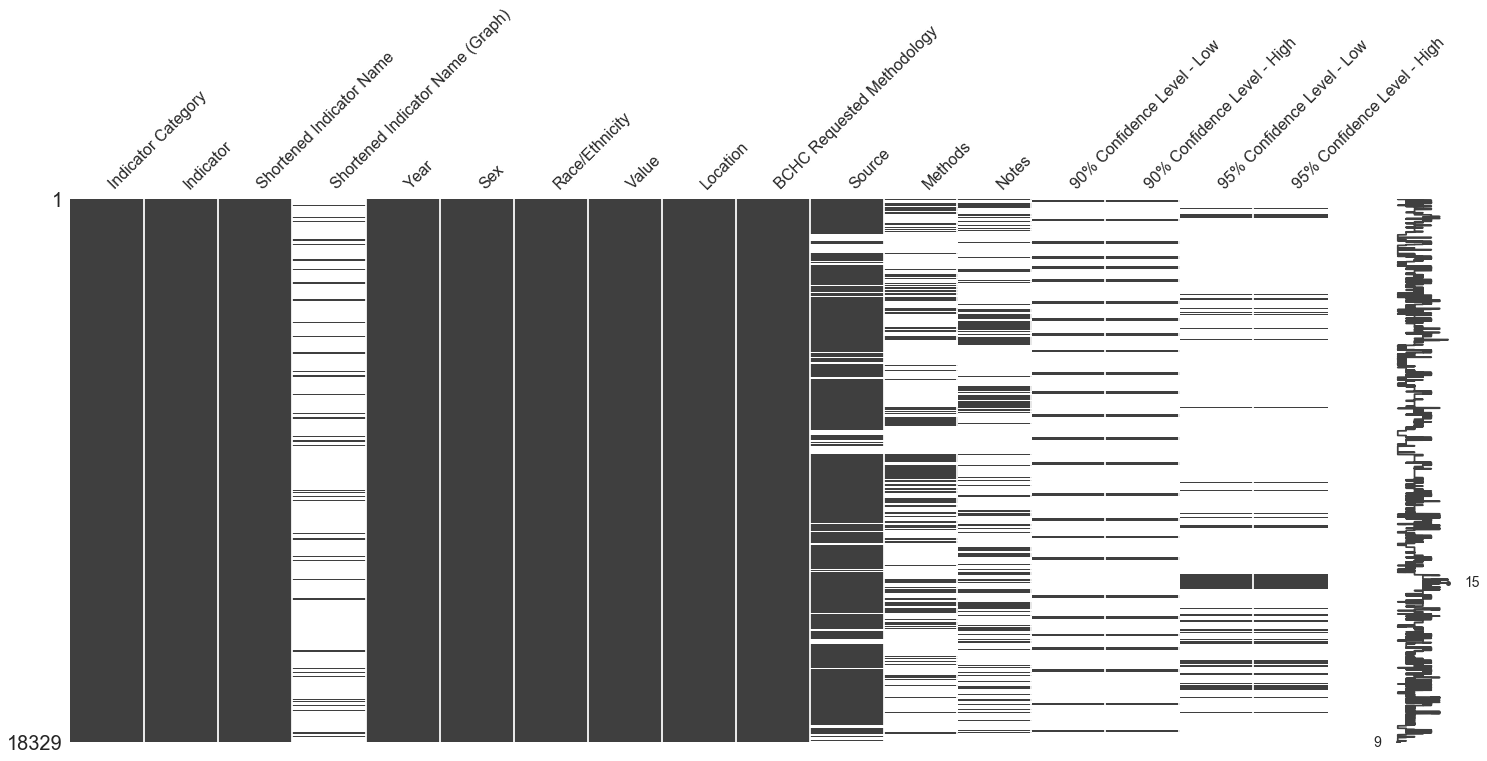

In [19]:
msno.matrix(health_df)

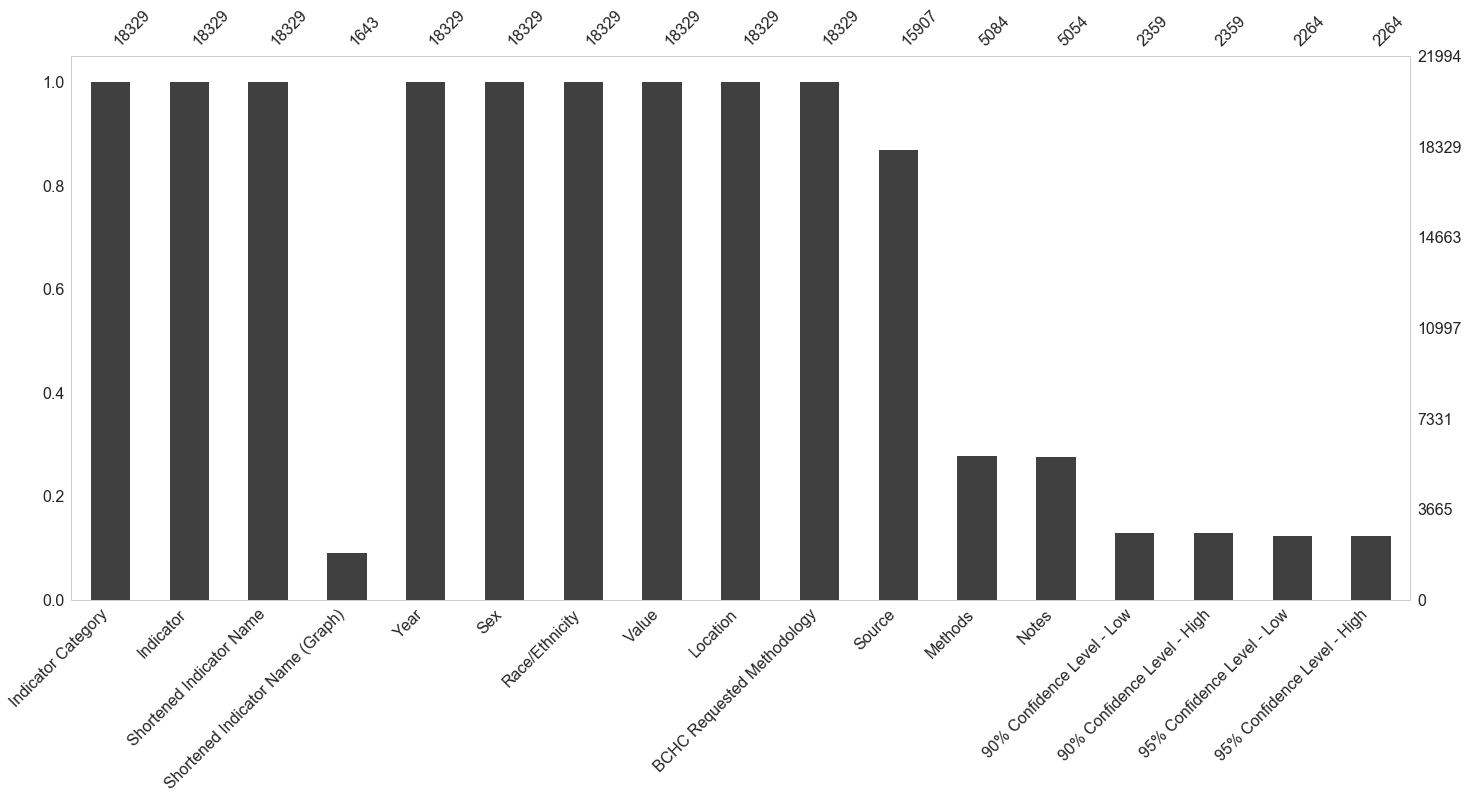

In [20]:
msno.bar(health_df)

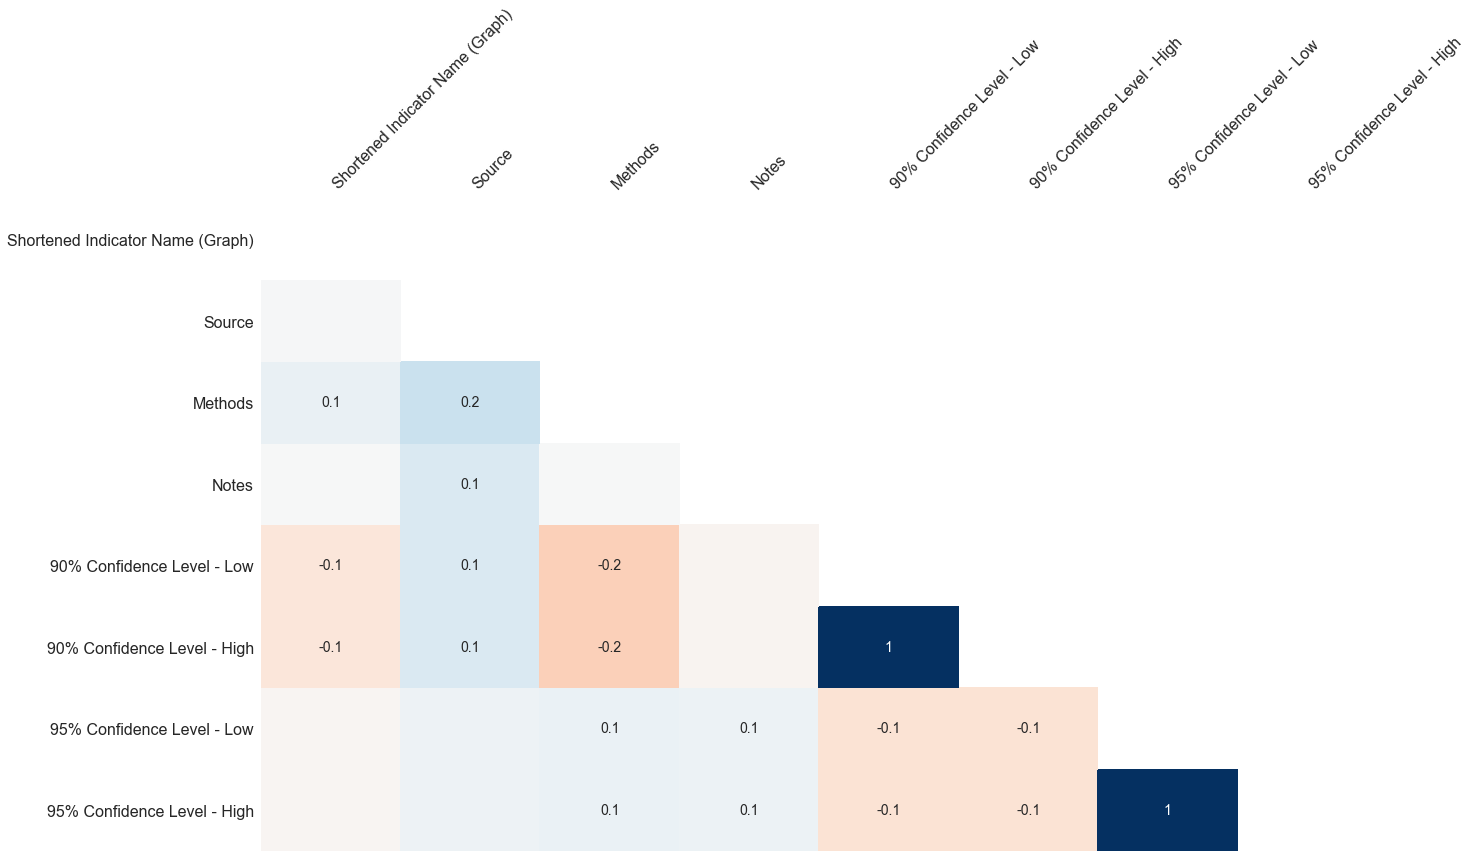

In [21]:
msno.heatmap(health_df)

## Visualizations

1. Correlation matrix
1. Bar plots
2. Histograms
3. Violin plots
5. Wordcloud
6. Scatterplots colored by label
 1. Add scatterplot with histograms on each axis
7. Line plot for time data
8. Choropleth for location data
9. 2d graph from Uber data
10. Graph / tree
11. New graph from kaggle

Get indicator name and category value counts.

In [22]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18329 entries, 0 to 18328
Data columns (total 17 columns):
Indicator Category                  18329 non-null object
Indicator                           18329 non-null object
Shortened Indicator Name            18329 non-null object
Shortened Indicator Name (Graph)    1643 non-null object
Year                                18329 non-null datetime64[ns]
Sex                                 18329 non-null object
Race/Ethnicity                      18329 non-null object
Value                               18329 non-null float64
Location                            18329 non-null object
BCHC Requested Methodology          18329 non-null object
Source                              15907 non-null object
Methods                             5084 non-null object
Notes                               5054 non-null object
90% Confidence Level - Low          2359 non-null float64
90% Confidence Level - High         2359 non-null float64
95% Confidence 

In [23]:
health_df['Indicator Category'].value_counts()

Chronic Disease                             3150
Demographics                                2736
Injury/Violence                             2397
HIV/AIDS                                    2291
Infectious Disease                          1804
Cancer                                      1705
Maternal and Child Health                   1540
Behavioral Health/Substance Abuse            900
Food Safety                                  858
Life Expectancy and Death Rate (Overall)     780
Environmental Health                         168
Name: Indicator Category, dtype: int64

Make bar plots of all indicators within each category.

1. Create a list of indicator categories. 
2. Iterate through each indicator category
3. During each iteration:
4. Make a value_counts series
5. Use the index as the x-variable and the values as the y-variable
6. Use plt.show()

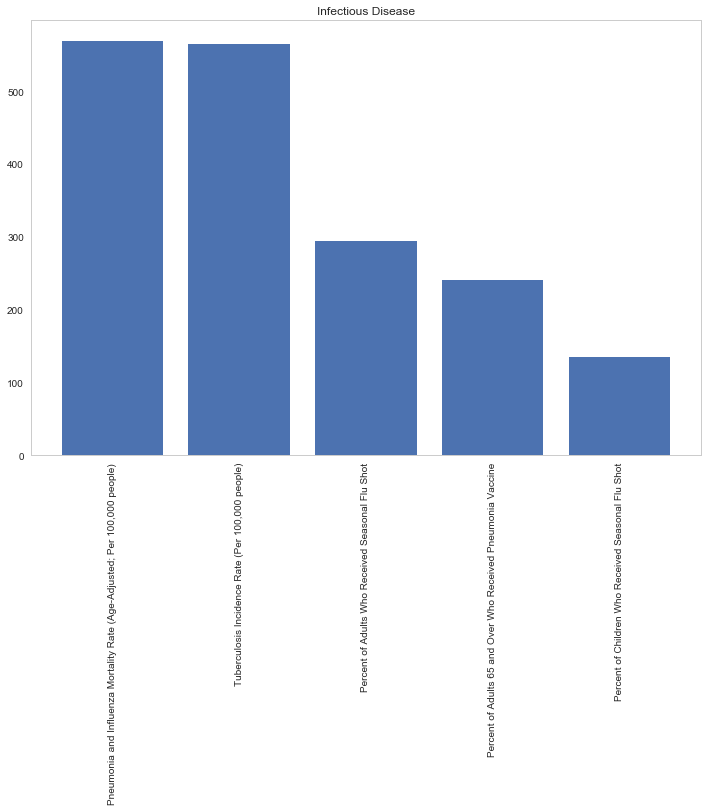

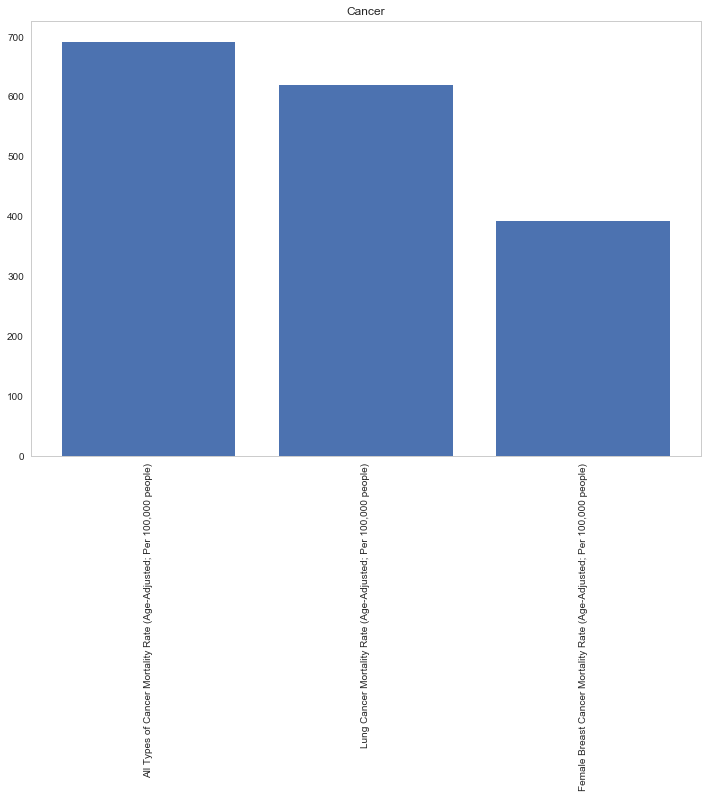

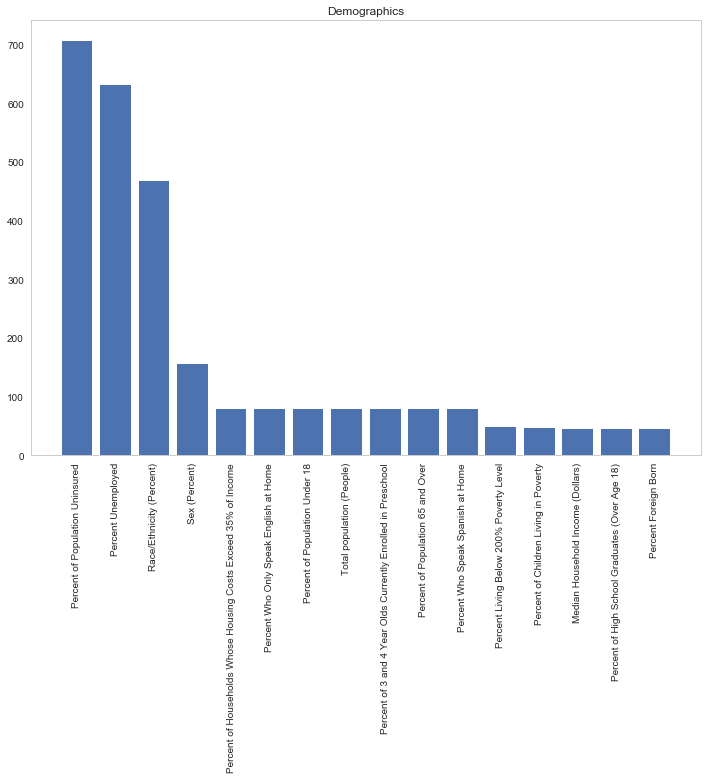

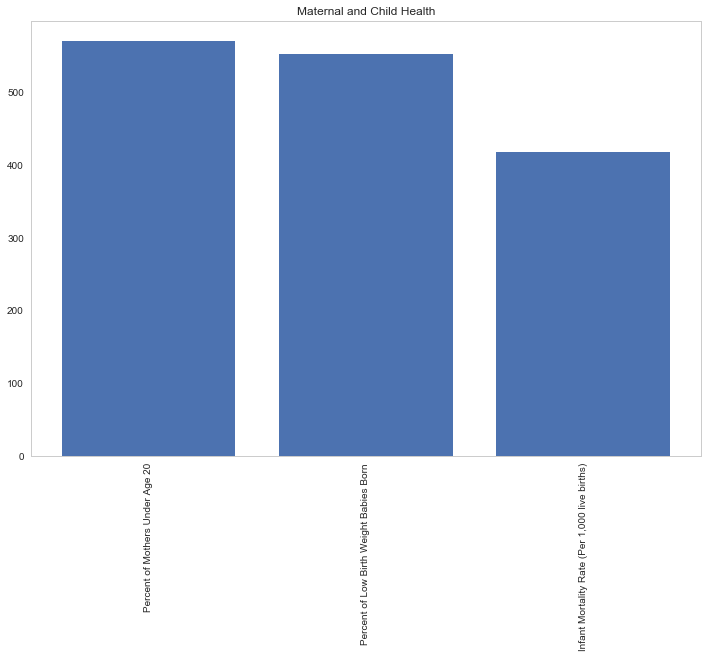

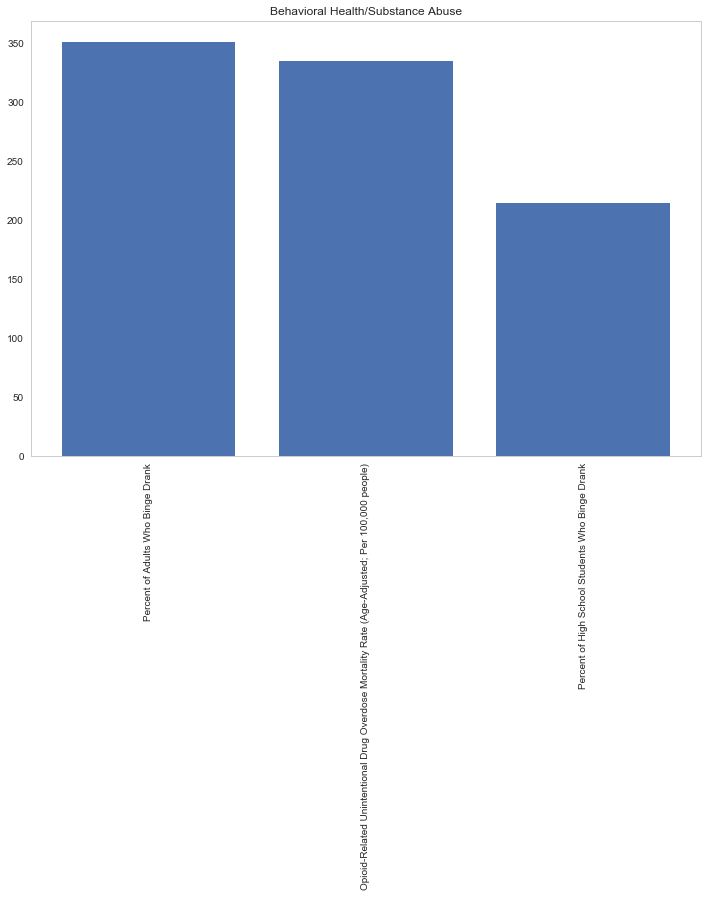

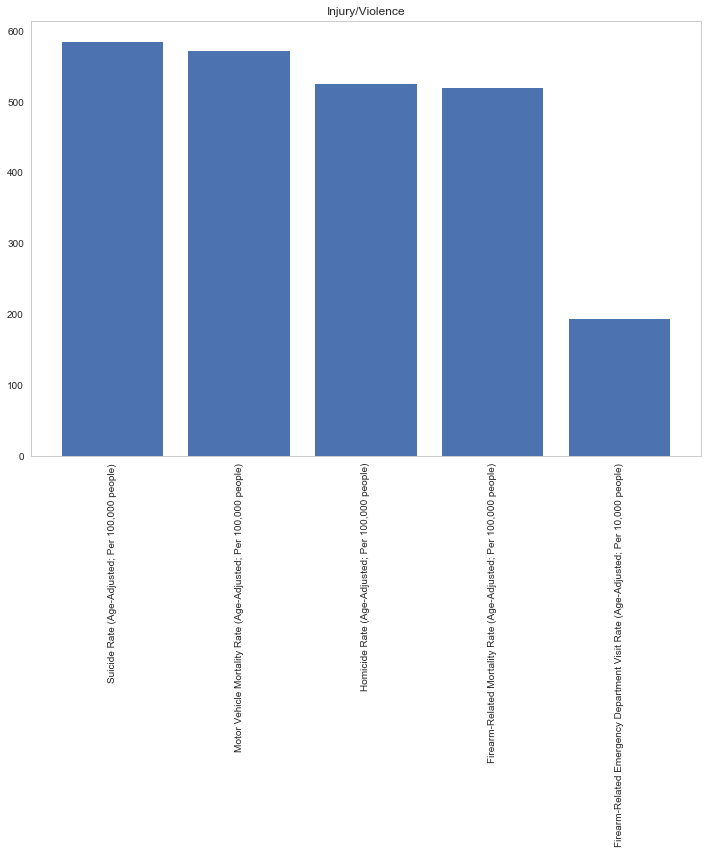

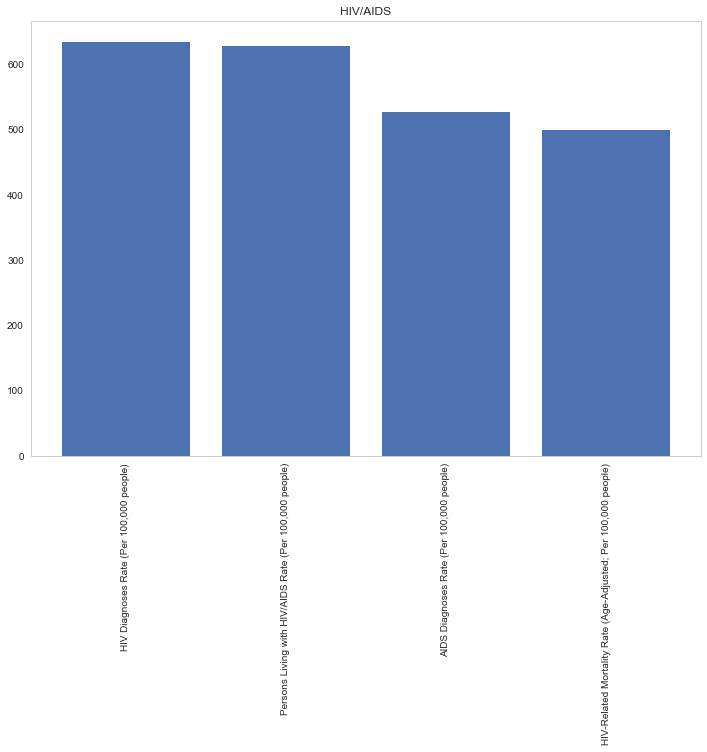

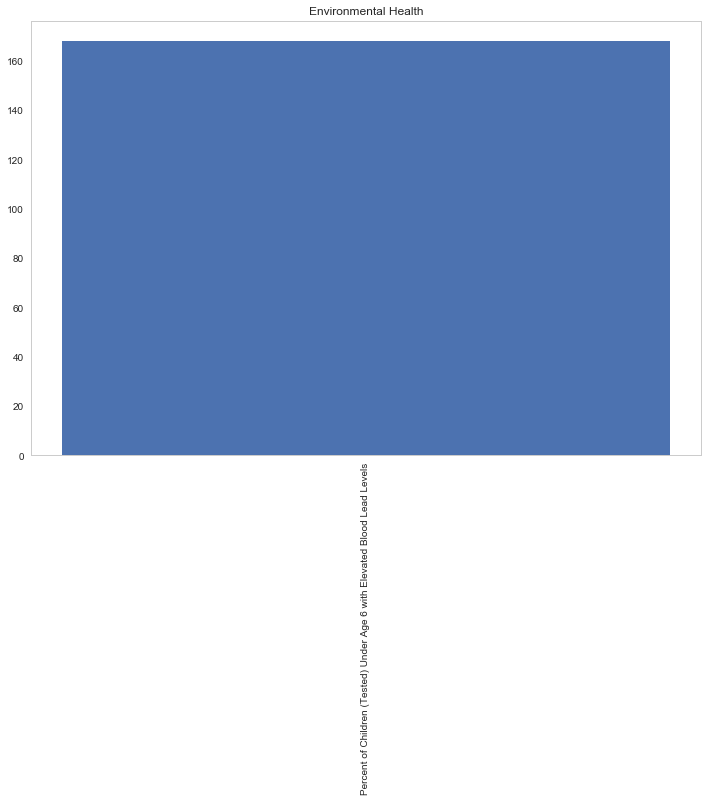

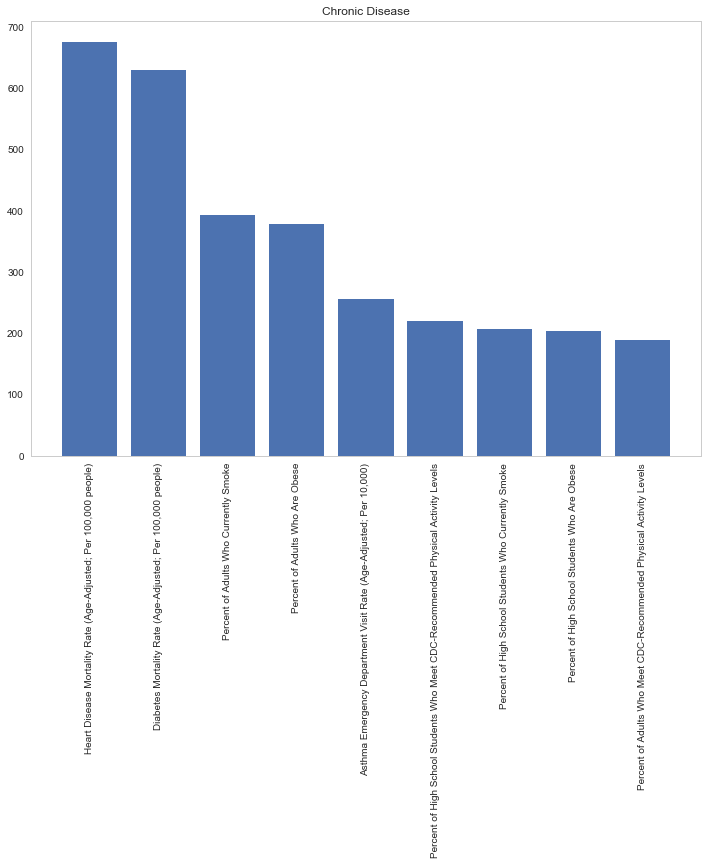

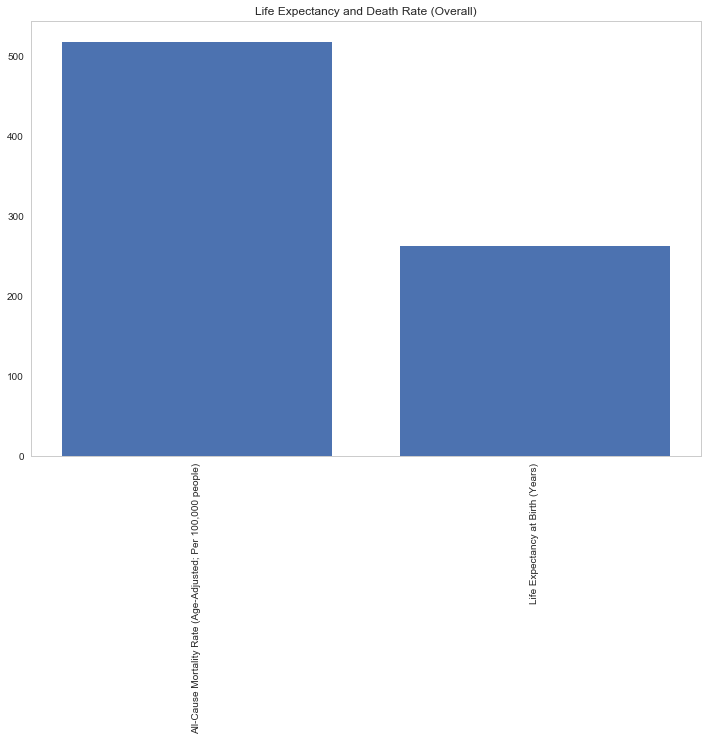

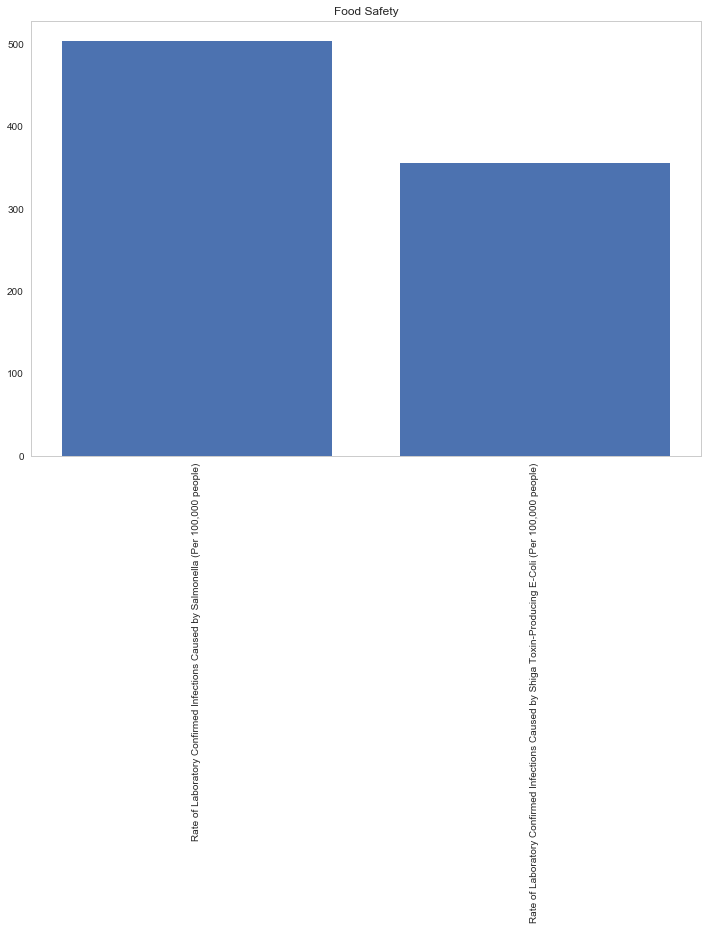

In [24]:
categories = set(health_df['Indicator Category'])

for category in categories:
    category_counts = health_df[health_df['Indicator Category'] == category]['Indicator'].value_counts()
    x = category_counts.index
    y = category_counts.values
    plt.figure(figsize=(12,8))
    plt.bar(range(len(x)), y)
    plt.xticks(range(len(x)), x, rotation=90)
    plt.title(category)
    plt.show()
    

Look at violin plots for chronic disease indicators by location.


Compare locations based on:
1. All types of cancer rate
2. AIDS diagnoses rate
3. People living with HIV rate
3. Percent of adults who are obese
4. Percent of adults who meet activity levels


In [26]:
health_df['Location'].value_counts()

U.S. Total                         1288
New York City, NY                  1110
Seattle, WA                         954
Phoenix, AZ                         932
Boston, MA                          912
Minneapolis, MN                     882
Miami (Miami-Dade County), FL       848
Denver, CO                          759
Los Angeles, CA                     732
Las Vegas (Clark County), NV        717
Long Beach, CA                      712
San Diego County, CA                705
Kansas City, MO                     691
Chicago, IL                         687
Detroit, MI                         674
San Antonio, TX                     617
Philadelphia, PA                    600
Washington, DC                      582
Houston, TX                         576
Oakland, CA                         531
San Francisco, CA                   517
Portland (Multnomah County), OR     501
San Jose, CA                        482
Fort Worth (Tarrant County), TX     427
Cleveland, OH                       373


### Reshaping the Data

Reshape the data. Need to organize by:
- Location
- Year
- Gender
- Race/Ethnicity

Designate the columns:
- Year
- Sex
- Race/Ethnicity
- Value
- Place
- List of the unique Indicators



In [27]:
health_reshaped = health_df.pivot_table(
    index=['Location', 'Year', 'Sex', 'Race/Ethnicity'],
    columns='Indicator',
    values='Value'
)
health_reshaped.reset_index(inplace=True)
health_reshaped.columns.name = None
health_reshaped.head()

,Location,Year,Sex,Race/Ethnicity,"AIDS Diagnoses Rate (Per 100,000 people)","All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)","All-Cause Mortality Rate (Age-Adjusted; Per 100,000 people)","Asthma Emergency Department Visit Rate (Age-Adjusted; Per 10,000)","Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)","Female Breast Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)","Firearm-Related Emergency Department Visit Rate (Age-Adjusted; Per 10,000 people)","Firearm-Related Mortality Rate (Age-Adjusted; Per 100,000 people)","HIV Diagnoses Rate (Per 100,000 people)","HIV-Related Mortality Rate (Age-Adjusted; Per 100,000 people)","Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)","Homicide Rate (Age-Adjusted; Per 100,000 people)","Infant Mortality Rate (Per 1,000 live births)",Life Expectancy at Birth (Years),"Lung Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)",Median Household Income (Dollars),"Motor Vehicle Mortality Rate (Age-Adjusted; Per 100,000 people)","Opioid-Related Unintentional Drug Overdose Mortality Rate (Age-Adjusted; Per 100,000 people)",Percent Foreign Born,Percent Living Below 200% Poverty Level,Percent Unemployed,Percent Who Only Speak English at Home,Percent Who Speak Spanish at Home,Percent of 3 and 4 Year Olds Currently Enrolled in Preschool,Percent of Adults 65 and Over Who Received Pneumonia Vaccine,Percent of Adults Who Are Obese,Percent of Adults Who Binge Drank,Percent of Adults Who Currently Smoke,Percent of Adults Who Meet CDC-Recommended Physical Activity Levels,Percent of Adults Who Received Seasonal Flu Shot,Percent of Children (Tested) Under Age 6 with Elevated Blood Lead Levels,Percent of Children Living in Poverty,Percent of Children Who Received Seasonal Flu Shot,Percent of High School Graduates (Over Age 18),Percent of High School Students Who Are Obese,Percent of High School Students Who Binge Drank,Percent of High School Students Who Currently Smoke,Percent of High School Students Who Meet CDC-Recommended Physical Activity Levels,Percent of Households Whose Housing Costs Exceed 35% of Income,Percent of Low Birth Weight Babies Born,Percent of Mothers Under Age 20,Percent of Population 65 and Over,Percent of Population Under 18,Percent of Population Uninsured,"Persons Living with HIV/AIDS Rate (Per 100,000 people)","Pneumonia and Influenza Mortality Rate (Age-Adjusted; Per 100,000 people)",Race/Ethnicity (Percent),"Rate of Laboratory Confirmed Infections Caused by Salmonella (Per 100,000 people)","Rate of Laboratory Confirmed Infections Caused by Shiga Toxin-Producing E-Coli (Per 100,000 people)",Sex (Percent),"Suicide Rate (Age-Adjusted; Per 100,000 people)",Total population (People),"Tuberculosis Incidence Rate (Per 100,000 people)"
0,"Baltimore, MD",2010-01-01,Both,All,57.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.6,29.2,14.5,24.3,68.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2495.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Baltimore, MD",2010-01-01,Both,Asian/PI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Baltimore, MD",2010-01-01,Both,Black,78.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6,32.8,9.5,29.4,62.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3449.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Baltimore, MD",2010-01-01,Both,Hispanic,44.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1232.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Baltimore, MD",2010-01-01,Both,White,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.6,25.4,21.1,19.4,75.5,NaN,NaN,NaN,NaN,NaN,

In [28]:
health_reshaped.to_csv('data/bhmi_reshaped.csv')

Need to drop outliers before creating correlation matrix. For loop?

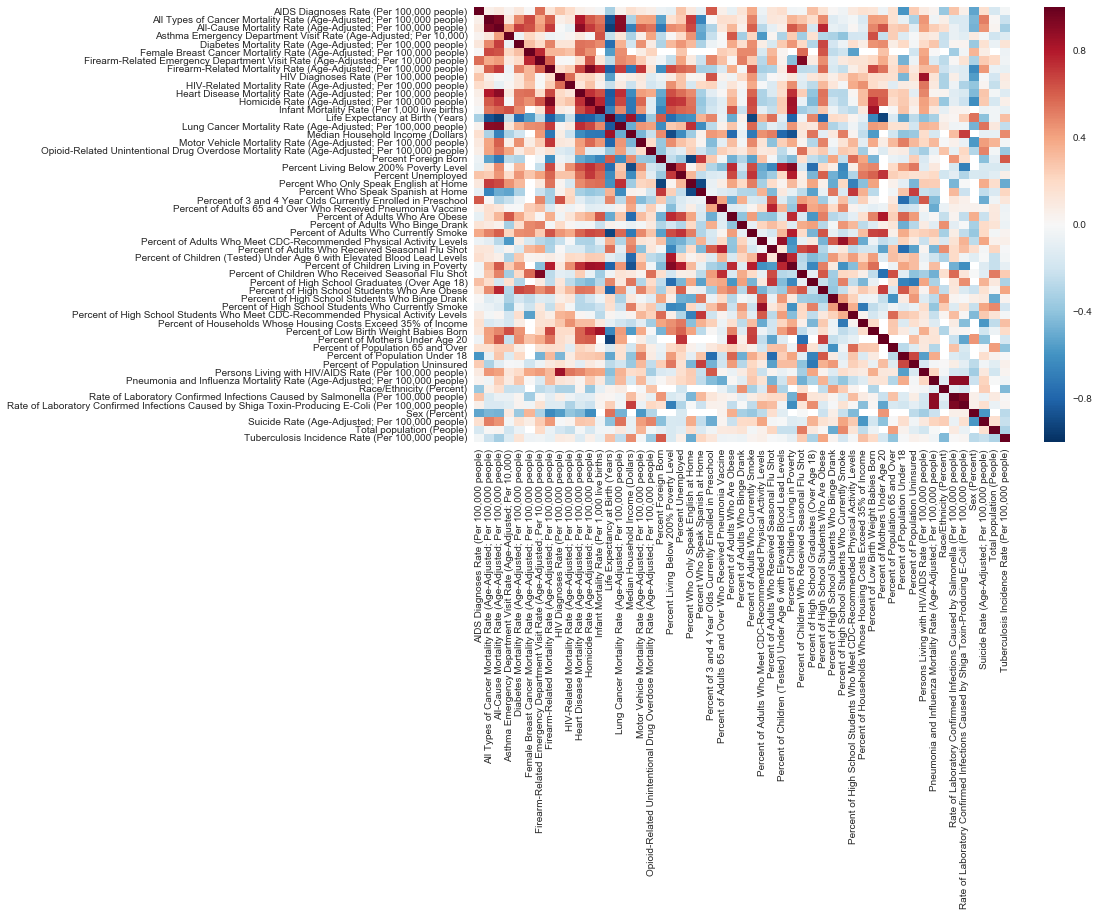

In [29]:
health_corr_mat = health_reshaped[health_reshaped['Rate of Laboratory Confirmed Infections Caused by Shiga Toxin-Producing E-Coli (Per 100,000 people)']<200].corr()
plt.figure(figsize=(12,8))
sns.heatmap(health_corr_mat)
plt.show()

Kendall's seems to be more robust to outliers.

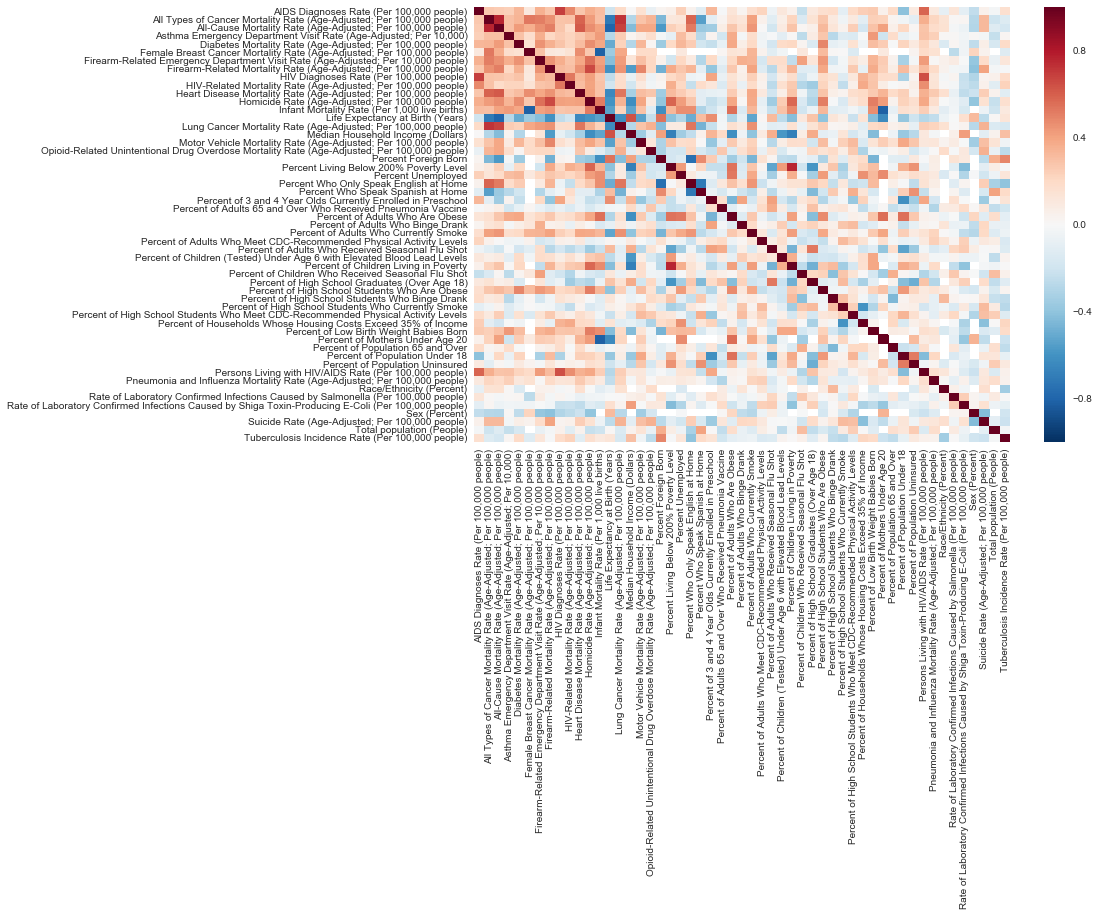

In [30]:
health_corr_mat = health_reshaped.corr(method='kendall')
plt.figure(figsize=(12,8))
sns.heatmap(health_corr_mat)
plt.show()

### Correlation Matrix Investigations

The goal's pretty simple: investigate any relationships with strong positive or negative correlations.

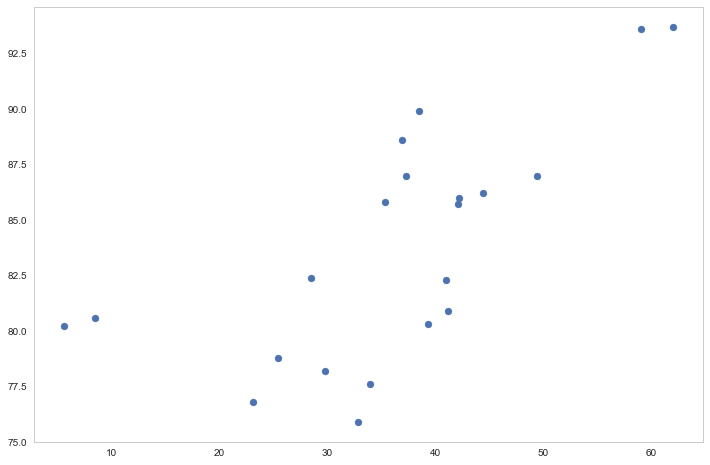

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(
    x='Percent of Adults Who Received Seasonal Flu Shot',
    y='Percent of High School Graduates (Over Age 18)',
    data=health_reshaped
)
plt.show()

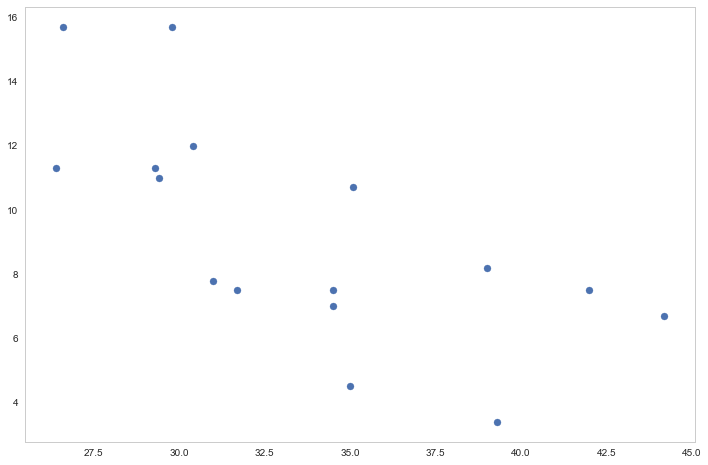

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(
    x='Percent of Households Whose Housing Costs Exceed 35% of Income',
    y='Percent of High School Students Who Currently Smoke',
    data=health_reshaped
)
plt.show()

## Feature Engineering

Need to figure out what you want to predict. Look at all features and decide what might be most useful to a hospital or healthcare provider. Then look at features and decide:

1. Which ones might be useful
2. Whether they require scaling
3. Transform necessary categorical variables

## Modeling

Use a variety of algorithms, pick the best one or two and tune those parameters.

## 

## 

## 

## 